<a href="https://colab.research.google.com/github/sanmevv/Turkey-Syria-Earthquake-Disaster-management-/blob/main/Preprocessing1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Classroom	    test_data.csv    tweetss.csv
'Colab Notebooks'   train_data.csv   val_data.csv


In [3]:
import pandas as pd

# Read the CSV file with ISO-8859-1 encoding
tweet_data = pd.read_csv('/content/drive/MyDrive/tweetss.csv')




<ipython-input-3-9968a4993893>:4: DtypeWarning: Columns (0,2,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  tweet_data = pd.read_csv('/content/drive/MyDrive/tweetss.csv')


In [4]:
tweet_data

,User_id,Username,Tweet_id,Date,Time,Tweet,Language,Location,Acctdesc,Source,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Extracted,Url
0,951570870,StellaMillburn,1637372875018510080.0,3/19/23 12:00 AM,8:38:08,"Next diplomatic victory on the horizon, Syria ...",en,NaN,"Socialist, grandmother to eight. #FreeJulianAs...","<a href=""http://twitter.com/download/iphone"" r...",0,0.0,0.0,[],758.0,183.0,3894.0,38:13.9,https://twitter.com/StellaMillburn/status/1637...
1,1023610564390480000,wacklena,1637372817145720064.0,3/19/23 12:00 AM,8:37:55,carpets that are made in turkey r so nice,en,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,0.0,0.0,[],277.0,86.0,21340.0,38:13.9,https://twitter.com/wacklena/status/1637372817...
2,1210532746046720000,resitcaliskan,1637372740859460096.0,3/19/23 12:00 AM,8:37:36,@O2 Hello Is there a pay-as-you-go Internet an...,en,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",0,0.0,0.0,[],104.0,5.0,123.0,38:13.9,https://twitter.com/resitcaliskan/status/16373...
3,1596201806488550000,ChrisCo53645942,1637372733808930048.0,3/19/23 12:00 AM,8:37:35,Spaghetti with turkey is available https://t.c...,en,"Lagos, Nigeria",COMEDIAN/CHEF,"<a href=""http://twitter.com/download/android"" ...",0,0.0,0.0,[],780.0,2215.0,30.0,38:13.9,https://twitter.com/ChrisCo53645942/status/163...
4,1529850416783140000,UA_22_Ukraine,1637372706667500032.0,3/19/23 12:00 AM,8:37:28,(Bloomberg) 🇸🇪#Sweden will continue efforts t...,en,NaN,"Support aux ukraniens, diverses nouvelles! 🇺🇦 ...","<a href=""http://twitter.com/download/android"" ...",0,0.0,0.0,"['#Sweden', '#Turkey', '#NATO', '#Erdogan', '#...",710.0,521.0,16989.0,38:13.9,https://twitter.com/UA_22_Ukraine/status/16373...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300016,1620638368940820000,iwannabear0ck,1628458452430230016.0,2/22/23 12:00 AM,18:15:25,@ilovebananaslut i have turkey jerky in my cab...,en,16 |5’3| bmi 12.3| ugw: 65lbs,i love pink,"<a href=""http://twitter.com/download/iphone"" r...",0.0,0.0,0,[],1588.0,1588.0,11779.0,44:53.6,https://twitter.com/iwannabear0ck/status/16284...
300017,207575214,hananelatr,1628458435174949888.0,2/22/23 12:00 AM,18:15:20,@TheBrentPeters @canarymission @MarkRuffalo Ye...,en,"Washington, DC",The only wife of @JKhashoggi upon his death. M...,"<a href=""http://twitter.com/download/iphone"" r...",0.0,0.0,1,[],1929.0,2140.0,30678.0,44:53.6,https://twitter.com/hananelatr/status/16284584...
300018,943677440903217000,devoutmoon,1628458428610789888.0,2/22/23 12:00 AM,18:15:19,@bansky This is wild. Pressure cook some Turke...,en,"arcadia grove, pa","The sky had never seemed so sky, the world had...","<a href=""http://twitter.com/download/iphone"" r...",1.0,0.0,0,[],241.0,29.0,18885.0,44:54.4,https://twitter.com/devoutmoon/status/16284584...
300019,933107033183793000,JTCryptoo,1628458427415419904.0,2/22/23 12:00 AM,18:15:19,@drew_web3 My go to Eggs and oats with blueber...,en,Subscribe →,Spreading Good Ideas On Personal Growth & Self...,"<a href=""http://twitter.com/download/iphone"" r...",0.0,0.0,1,[],809.0,2202.0,15834.0,44:54.4,https://twitter.com/JTCryptoo/status/162845842...


In [5]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# Most basic stuff for EDA.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Core packages for text processing.

import string
import re

# Libraries for text preprocessing.

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Loading some sklearn packaces for modelling.

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics import f1_score, accuracy_score

# Some packages for word clouds and NER.

from wordcloud import WordCloud, STOPWORDS
from collections import Counter, defaultdict
from PIL import Image
import spacy
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.5/en_core_web_sm-2.2.5.tar.gz
import en_core_web_sm

# Core packages for general use throughout the notebook.

import random
import warnings
import time
import datetime

# For customizing our plots.

from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

# Loading pytorch packages.

import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, BertConfig, get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, random_split, DataLoader, RandomSampler, SequentialSampler

# Setting some options for general use.

stop = set(stopwords.words('english'))
plt.style.use('fivethirtyeight')
sns.set(font_scale=1.5)
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
warnings.filterwarnings('ignore')


#Setting seeds for consistent results.
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 43.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.5-py3-none-any.whl size=12011736 sha256=e92aa43405c06a0c64bedf1c9dcfd4ad83941b0edc135a2300b5d33e9af76ea1
  Stored in directory: /root/.cache/pip/wheels/57/07/ed/22b6eecc1314cf0e1cbfb45ebeb5ba063dfbc86645f6f23c23
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.5.0
    Uninstalling en-core-web-sm-3.5.0:
      Successfully uninstalled en-core-web-sm-3.5.0


/usr/local/lib/python3.9/dist-packages/spacy/util.py:895: UserWarning: [W094] Model 'en_core_web_sm' (2.2.5) specifies an under-constrained spaCy version requirement: >=2.2.2. This can lead to compatibility problems with older versions, or as new spaCy versions are released, because the model may say it's compatible when it's not. Consider changing the "spacy_version" in your meta.json to a version range, with a lower and upper pin. For example: >=3.5.1,<3.6.0
  warnings.warn(warn_msg)


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the tweet data into a Pandas dataframe


# Shuffle the data
tweet_data = tweet_data.sample(frac=1).reset_index(drop=True)

# Split the data into training, validation, and test sets
train_data, test_data = train_test_split(tweet_data, test_size=0.1, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Save the resulting datasets as separate files or data frames
train_data.to_csv('train_data.csv', index=False)
val_data.to_csv('val_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)


In [8]:
trainv = pd.read_csv('/content/drive/MyDrive/train_data.csv')
testv = pd.read_csv('/content/drive/MyDrive/test_data.csv')

In [9]:
# Taking general look at the both datasets.
display(trainv.sample(5))

,User_id,Username,Tweet_id,Date,Time,Tweet,Language,Location,Acctdesc,Source,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Extracted,Url
18941,272654011,tzraik,1.62991143632227e+18,2/26/23 12:00 AM,18:29:03,"Egypt's foreign minister to visit Syria, Turke...",en,"Atlanta, Georgia","Retired Infectious Disease specialist, interes...","<a href=""http://twitter.com/#!/download/ipad"" ...",0.0,0.0,0,[],795.0,380.0,75274.0,57:14.7,https://twitter.com/tzraik/status/162991143632...
16120,1091346276552190000,WUMLNowPlaying,1.63010358663281e+18,2/27/23 12:00 AM,7:12:35,The Happy Fits — Cold Turkey,en,"Lowell, MA","See what's playing on 91.5 FM WUML, Lowell!","<a href=""http://spinitron.com"" rel=""nofollow"">...",0.0,0.0,0,[],2.0,194.0,190700.0,51:57.1,https://twitter.com/WUMLNowPlaying/status/1630...
72383,94095169,newlandhouse,1636757257944709888.0,3/17/23 12:00 AM,15:51:54,Congratulations to our Year 7 &amp; 8s for rai...,en,"Twickenham, TW1 4TQ",An experienced & popular Prep & Nursery for bo...,"<a href=""https://www.hootsuite.com"" rel=""nofol...",0.0,0.0,2.0,[],88.0,1290.0,1356.0,53:20.1,https://twitter.com/newlandhouse/status/163675...
29908,1585571377486100000,sanzeelv,1629383222936190000,2/25/23 12:00 AM,7:30:07,Turkey Begins To Rebuild Homes For 1.5 Million...,en,NaN,NaN,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",0.0,0.0,0,[],59.0,14.0,46941.0,13:35.5,https://twitter.com/sanzeelv/status/1629383222...
176409,1265613826852080000,hyunlilin,1633430809389530112.0,3/8/23 12:00 AM,11:33:47,@straykidssdoc Fav Group - Stray Kids\n\nULT B...,en,#loveSTAY,19▫️ENFP / 2w3 • STAY - MOA - ENGENE - ATINY /...,"<a href=""http://twitter.com/download/iphone"" r...",0,0.0,0.0,[],41.0,14.0,166.0,14:04.0,https://twitter.com/hyunlilin/status/163343080...


In [10]:
display(testv.sample(5))

,User_id,Username,Tweet_id,Date,Time,Tweet,Language,Location,Acctdesc,Source,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Extracted,Url
4769,3691698436,peaknick_,1632439888862650000,3/5/23 12:00 AM,17:56:13,@caglarryildiz @fcdynamo So when does the tran...,en,Россия,VP R6 fan | 🤍💙🤍,"<a href=""http://twitter.com/download/android"" ...",1.0,0.0,0,[],552.0,51.0,1279.0,43:25.3,https://twitter.com/peaknick_/status/163243988...
23673,896500668185288000,RobertS03331996,1.63654773081336e+18,3/17/23 12:00 AM,1:59:19,NATO is a fucking joke! Turkey is a NATO memb...,en,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,0.0,0.0,[],98.0,29.0,14401.0,58:35.7,https://twitter.com/RobertS03331996/status/163...
4268,1548579651584500000,theolunas,1634505910776200000,3/11/23 12:00 AM,10:45:51,@abilon2011 @OmarRudberg You are talking about...,en,🏐🎤🎬,NaN,"<a href=""http://twitter.com/download/android"" ...",1.0,0.0,0.0,[],90.0,99.0,2634.0,49:12.2,https://twitter.com/theolunas/status/163450591...
16399,197763471,JagathKey,1628908864396570000,2/24/23 12:00 AM,0:05:11,Turkey fines broadcasters for coverage critica...,en,"Galle, Sri Lanka","Resident of Galle, Sri Lanka.","<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,1.0,2,[],2336.0,509.0,14095.0,27:41.4,https://twitter.com/JagathKey/status/162890886...
23649,952926584,DiogenedArc,1.63632607961381e+18,3/16/23 12:00 AM,11:18:33,"Meeting of Turkey, Syria, Iran, Russia, offici...",en,Un Européen aux Amériques,Auteur euro-américain tendance latino 🇫🇷🇧🇷🇪🇺\n...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,0.0,0,[],6738.0,9743.0,329253.0,05:13.7,https://twitter.com/DiogenedArc/status/1636326...


In [11]:
# Checking observation and feature numbers for train and test data.

print(trainv.shape)
print(testv.shape)

(216014, 19)
(30003, 19)


In [12]:
trainv['Tweet'] = trainv['Tweet'].astype(str)


Cleaning Text

In [13]:
trainv['Tweet'] = trainv['Tweet'].fillna('')


In [14]:
# Some basic helper functions to clean text by removing urls, emojis, html tags and punctuations.

def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)


def remove_emoji(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def remove_html(text):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', text)


def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Applying helper functions

trainv['Tweet_clean'] = trainv['Tweet'].apply(lambda x: remove_URL(x))
trainv['Tweet_clean'] = trainv['Tweet_clean'].apply(lambda x: remove_emoji(x))
trainv['Tweet_clean'] = trainv['Tweet_clean'].apply(lambda x: remove_html(x))
trainv['Tweet_clean'] = trainv['Tweet_clean'].apply(lambda x: remove_punct(x))

In [15]:
# Tokenizing the tweet base texts.

trainv['Tokenized'] = trainv['Tweet_clean'].apply(word_tokenize)

trainv.head()

,User_id,Username,Tweet_id,Date,Time,Tweet,Language,Location,Acctdesc,Source,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Extracted,Url,Tweet_clean,Tokenized
0,2726643290,BarzaniCF,1.6297574106624e+18,2/26/23 12:00 AM,8:17:00,#BCF preparing parcels of food at #Erbil headq...,en,Iraq,The BCF is a non-profit non-governmental organ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.0,16.0,141,"['#BCF', '#Erbil', '#earthquake', '#Turkey', '...",1.0,11138.0,1389.0,02:14.6,https://twitter.com/BarzaniCF/status/162975741...,BCF preparing parcels of food at Erbil headqua...,"[BCF, preparing, parcels, of, food, at, Erbil,..."
1,1330584404226430000,pslovekatelynn,1.6371243434308e+18,3/18/23 12:00 AM,16:10:34,Do I get a Philly or a mile high turkey from L...,en,NaN,23. 🩺 | Published Author,"<a href=""http://twitter.com/download/iphone"" r...",0.0,0.0,0.0,[],188.0,214.0,1815.0,43:19.8,https://twitter.com/pslovekatelynn/status/1637...,Do I get a Philly or a mile high turkey from L...,"[Do, I, get, a, Philly, or, a, mile, high, tur..."
2,700330759,JJTHEGYMRAT,1.6285544647674e+18,2/23/23 12:00 AM,0:36:56,"@Roastbeast26 Chicken, lean ground sirloin , l...",en,"Florida, USA",I lift and say fuck a lot #bebetter #noexcuse...,"<a href=""http://twitter.com/download/iphone"" r...",1.0,0.0,1,[],373.0,2862.0,21467.0,40:58.7,https://twitter.com/JJTHEGYMRAT/status/1628554...,Roastbeast26 Chicken lean ground sirloin lean...,"[Roastbeast26, Chicken, lean, ground, sirloin,..."
3,1476218094196500000,AlexLacl,1.63678498972253e+18,3/17/23 12:00 AM,17:42:06,@nandy_here @sinanseventy @Onlyhur1 @FormulaUR...,en,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",3.0,0.0,1.0,[],155.0,44.0,1271.0,52:06.1,https://twitter.com/AlexLacl/status/1636784989...,nandyhere sinanseventy Onlyhur1 FormulaUR Alon...,"[nandyhere, sinanseventy, Onlyhur1, FormulaUR,..."
4,1209233672,BasilBandwagon,1.63382307944396e+18,3/9/23 12:00 AM,13:32:31,"#Clinton Soups: Turkey Veggie Noodles (gf), Sm...",en,"Hunterdon County, New Jersey",Hunterdon County's premier Natural Market and ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,0.0,0.0,"['#Clinton', '#Clinton']",1698.0,867.0,5473.0,04:08.3,https://twitter.com/BasilBandwagon/status/1633...,Clinton Soups Turkey Veggie Noodles gf Smoky W...,"[Clinton, Soups, Turkey, Veggie, Noodles, gf, ..."


In [16]:
# Lower casing clean text.

trainv['Lower'] = trainv['Tokenized'].apply(
    lambda x: [word.lower() for word in x])

trainv.head()

,User_id,Username,Tweet_id,Date,Time,Tweet,Language,Location,Acctdesc,Source,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Extracted,Url,Tweet_clean,Tokenized,Lower
0,2726643290,BarzaniCF,1.6297574106624e+18,2/26/23 12:00 AM,8:17:00,#BCF preparing parcels of food at #Erbil headq...,en,Iraq,The BCF is a non-profit non-governmental organ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.0,16.0,141,"['#BCF', '#Erbil', '#earthquake', '#Turkey', '...",1.0,11138.0,1389.0,02:14.6,https://twitter.com/BarzaniCF/status/162975741...,BCF preparing parcels of food at Erbil headqua...,"[BCF, preparing, parcels, of, food, at, Erbil,...","[bcf, preparing, parcels, of, food, at, erbil,..."
1,1330584404226430000,pslovekatelynn,1.6371243434308e+18,3/18/23 12:00 AM,16:10:34,Do I get a Philly or a mile high turkey from L...,en,NaN,23. 🩺 | Published Author,"<a href=""http://twitter.com/download/iphone"" r...",0.0,0.0,0.0,[],188.0,214.0,1815.0,43:19.8,https://twitter.com/pslovekatelynn/status/1637...,Do I get a Philly or a mile high turkey from L...,"[Do, I, get, a, Philly, or, a, mile, high, tur...","[do, i, get, a, philly, or, a, mile, high, tur..."
2,700330759,JJTHEGYMRAT,1.6285544647674e+18,2/23/23 12:00 AM,0:36:56,"@Roastbeast26 Chicken, lean ground sirloin , l...",en,"Florida, USA",I lift and say fuck a lot #bebetter #noexcuse...,"<a href=""http://twitter.com/download/iphone"" r...",1.0,0.0,1,[],373.0,2862.0,21467.0,40:58.7,https://twitter.com/JJTHEGYMRAT/status/1628554...,Roastbeast26 Chicken lean ground sirloin lean...,"[Roastbeast26, Chicken, lean, ground, sirloin,...","[roastbeast26, chicken, lean, ground, sirloin,..."
3,1476218094196500000,AlexLacl,1.63678498972253e+18,3/17/23 12:00 AM,17:42:06,@nandy_here @sinanseventy @Onlyhur1 @FormulaUR...,en,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",3.0,0.0,1.0,[],155.0,44.0,1271.0,52:06.1,https://twitter.com/AlexLacl/status/1636784989...,nandyhere sinanseventy Onlyhur1 FormulaUR Alon...,"[nandyhere, sinanseventy, Onlyhur1, FormulaUR,...","[nandyhere, sinanseventy, onlyhur1, formulaur,..."
4,1209233672,BasilBandwagon,1.63382307944396e+18,3/9/23 12:00 AM,13:32:31,"#Clinton Soups: Turkey Veggie Noodles (gf), Sm...",en,"Hunterdon County, New Jersey",Hunterdon County's premier Natural Market and ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,0.0,0.0,"['#Clinton', '#Clinton']",1698.0,867.0,5473.0,04:08.3,https://twitter.com/BasilBandwagon/status/1633...,Clinton Soups Turkey Veggie Noodles gf Smoky W...,"[Clinton, Soups, Turkey, Veggie, Noodles, gf, ...","[clinton, soups, turkey, veggie, noodles, gf, ..."


In [17]:
# Removing stopwords.

trainv['Stopwords_removed'] = trainv['Lower'].apply(
    lambda x: [word for word in x if word not in stop])

trainv.head()

,User_id,Username,Tweet_id,Date,Time,Tweet,Language,Location,Acctdesc,Source,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Extracted,Url,Tweet_clean,Tokenized,Lower,Stopwords_removed
0,2726643290,BarzaniCF,1.6297574106624e+18,2/26/23 12:00 AM,8:17:00,#BCF preparing parcels of food at #Erbil headq...,en,Iraq,The BCF is a non-profit non-governmental organ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.0,16.0,141,"['#BCF', '#Erbil', '#earthquake', '#Turkey', '...",1.0,11138.0,1389.0,02:14.6,https://twitter.com/BarzaniCF/status/162975741...,BCF preparing parcels of food at Erbil headqua...,"[BCF, preparing, parcels, of, food, at, Erbil,...","[bcf, preparing, parcels, of, food, at, erbil,...","[bcf, preparing, parcels, food, erbil, headqua..."
1,1330584404226430000,pslovekatelynn,1.6371243434308e+18,3/18/23 12:00 AM,16:10:34,Do I get a Philly or a mile high turkey from L...,en,NaN,23. 🩺 | Published Author,"<a href=""http://twitter.com/download/iphone"" r...",0.0,0.0,0.0,[],188.0,214.0,1815.0,43:19.8,https://twitter.com/pslovekatelynn/status/1637...,Do I get a Philly or a mile high turkey from L...,"[Do, I, get, a, Philly, or, a, mile, high, tur...","[do, i, get, a, philly, or, a, mile, high, tur...","[get, philly, mile, high, turkey, lenny, ’, co..."
2,700330759,JJTHEGYMRAT,1.6285544647674e+18,2/23/23 12:00 AM,0:36:56,"@Roastbeast26 Chicken, lean ground sirloin , l...",en,"Florida, USA",I lift and say fuck a lot #bebetter #noexcuse...,"<a href=""http://twitter.com/download/iphone"" r...",1.0,0.0,1,[],373.0,2862.0,21467.0,40:58.7,https://twitter.com/JJTHEGYMRAT/status/1628554...,Roastbeast26 Chicken lean ground sirloin lean...,"[Roastbeast26, Chicken, lean, ground, sirloin,...","[roastbeast26, chicken, lean, ground, sirloin,...","[roastbeast26, chicken, lean, ground, sirloin,..."
3,1476218094196500000,AlexLacl,1.63678498972253e+18,3/17/23 12:00 AM,17:42:06,@nandy_here @sinanseventy @Onlyhur1 @FormulaUR...,en,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",3.0,0.0,1.0,[],155.0,44.0,1271.0,52:06.1,https://twitter.com/AlexLacl/status/1636784989...,nandyhere sinanseventy Onlyhur1 FormulaUR Alon...,"[nandyhere, sinanseventy, Onlyhur1, FormulaUR,...","[nandyhere, sinanseventy, onlyhur1, formulaur,...","[nandyhere, sinanseventy, onlyhur1, formulaur,..."
4,1209233672,BasilBandwagon,1.63382307944396e+18,3/9/23 12:00 AM,13:32:31,"#Clinton Soups: Turkey Veggie Noodles (gf), Sm...",en,"Hunterdon County, New Jersey",Hunterdon County's premier Natural Market and ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,0.0,0.0,"['#Clinton', '#Clinton']",1698.0,867.0,5473.0,04:08.3,https://twitter.com/BasilBandwagon/status/1633...,Clinton Soups Turkey Veggie Noodles gf Smoky W...,"[Clinton, Soups, Turkey, Veggie, Noodles, gf, ...","[clinton, soups, turkey, veggie, noodles, gf, ...","[clinton, soups, turkey, veggie, noodles, gf, ..."


In [18]:
# Applying part of speech tags.

trainv['Pos_tags'] = trainv['Stopwords_removed'].apply(nltk.tag.pos_tag)

trainv.head()


,User_id,Username,Tweet_id,Date,Time,Tweet,Language,Location,Acctdesc,Source,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Extracted,Url,Tweet_clean,Tokenized,Lower,Stopwords_removed,Pos_tags
0,2726643290,BarzaniCF,1.6297574106624e+18,2/26/23 12:00 AM,8:17:00,#BCF preparing parcels of food at #Erbil headq...,en,Iraq,The BCF is a non-profit non-governmental organ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.0,16.0,141,"['#BCF', '#Erbil', '#earthquake', '#Turkey', '...",1.0,11138.0,1389.0,02:14.6,https://twitter.com/BarzaniCF/status/162975741...,BCF preparing parcels of food at Erbil headqua...,"[BCF, preparing, parcels, of, food, at, Erbil,...","[bcf, preparing, parcels, of, food, at, erbil,...","[bcf, preparing, parcels, food, erbil, headqua...","[(bcf, NN), (preparing, VBG), (parcels, NNS), ..."
1,1330584404226430000,pslovekatelynn,1.6371243434308e+18,3/18/23 12:00 AM,16:10:34,Do I get a Philly or a mile high turkey from L...,en,NaN,23. 🩺 | Published Author,"<a href=""http://twitter.com/download/iphone"" r...",0.0,0.0,0.0,[],188.0,214.0,1815.0,43:19.8,https://twitter.com/pslovekatelynn/status/1637...,Do I get a Philly or a mile high turkey from L...,"[Do, I, get, a, Philly, or, a, mile, high, tur...","[do, i, get, a, philly, or, a, mile, high, tur...","[get, philly, mile, high, turkey, lenny, ’, co...","[(get, VB), (philly, RB), (mile, JJ), (high, J..."
2,700330759,JJTHEGYMRAT,1.6285544647674e+18,2/23/23 12:00 AM,0:36:56,"@Roastbeast26 Chicken, lean ground sirloin , l...",en,"Florida, USA",I lift and say fuck a lot #bebetter #noexcuse...,"<a href=""http://twitter.com/download/iphone"" r...",1.0,0.0,1,[],373.0,2862.0,21467.0,40:58.7,https://twitter.com/JJTHEGYMRAT/status/1628554...,Roastbeast26 Chicken lean ground sirloin lean...,"[Roastbeast26, Chicken, lean, ground, sirloin,...","[roastbeast26, chicken, lean, ground, sirloin,...","[roastbeast26, chicken, lean, ground, sirloin,...","[(roastbeast26, NN), (chicken, JJ), (lean, JJ)..."
3,1476218094196500000,AlexLacl,1.63678498972253e+18,3/17/23 12:00 AM,17:42:06,@nandy_here @sinanseventy @Onlyhur1 @FormulaUR...,en,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",3.0,0.0,1.0,[],155.0,44.0,1271.0,52:06.1,https://twitter.com/AlexLacl/status/1636784989...,nandyhere sinanseventy Onlyhur1 FormulaUR Alon...,"[nandyhere, sinanseventy, Onlyhur1, FormulaUR,...","[nandyhere, sinanseventy, onlyhur1, formulaur,...","[nandyhere, sinanseventy, onlyhur1, formulaur,...","[(nandyhere, RB), (sinanseventy, JJ), (onlyhur..."
4,1209233672,BasilBandwagon,1.63382307944396e+18,3/9/23 12:00 AM,13:32:31,"#Clinton Soups: Turkey Veggie Noodles (gf), Sm...",en,"Hunterdon County, New Jersey",Hunterdon County's premier Natural Market and ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,0.0,0.0,"['#Clinton', '#Clinton']",1698.0,867.0,5473.0,04:08.3,https://twitter.com/BasilBandwagon/status/1633...,Clinton Soups Turkey Veggie Noodles gf Smoky W...,"[Clinton, Soups, Turkey, Veggie, Noodles, gf, ...","[clinton, soups, turkey, veggie, noodles, gf, ...","[clinton, soups, turkey, veggie, noodles, gf, ...","[(clinton, NN), (soups, NNS), (turkey, VBP), (..."


In [19]:
# Converting part of speeches to wordnet format.
import nltk
nltk.download('omw-1.4')

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


trainv['Wordnet_pos'] = trainv['Pos_tags'].apply(
    lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

trainv.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,User_id,Username,Tweet_id,Date,Time,Tweet,Language,Location,Acctdesc,Source,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Extracted,Url,Tweet_clean,Tokenized,Lower,Stopwords_removed,Pos_tags,Wordnet_pos
0,2726643290,BarzaniCF,1.6297574106624e+18,2/26/23 12:00 AM,8:17:00,#BCF preparing parcels of food at #Erbil headq...,en,Iraq,The BCF is a non-profit non-governmental organ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.0,16.0,141,"['#BCF', '#Erbil', '#earthquake', '#Turkey', '...",1.0,11138.0,1389.0,02:14.6,https://twitter.com/BarzaniCF/status/162975741...,BCF preparing parcels of food at Erbil headqua...,"[BCF, preparing, parcels, of, food, at, Erbil,...","[bcf, preparing, parcels, of, food, at, erbil,...","[bcf, preparing, parcels, food, erbil, headqua...","[(bcf, NN), (preparing, VBG), (parcels, NNS), ...","[(bcf, n), (preparing, v), (parcels, n), (food..."
1,1330584404226430000,pslovekatelynn,1.6371243434308e+18,3/18/23 12:00 AM,16:10:34,Do I get a Philly or a mile high turkey from L...,en,NaN,23. 🩺 | Published Author,"<a href=""http://twitter.com/download/iphone"" r...",0.0,0.0,0.0,[],188.0,214.0,1815.0,43:19.8,https://twitter.com/pslovekatelynn/status/1637...,Do I get a Philly or a mile high turkey from L...,"[Do, I, get, a, Philly, or, a, mile, high, tur...","[do, i, get, a, philly, or, a, mile, high, tur...","[get, philly, mile, high, turkey, lenny, ’, co...","[(get, VB), (philly, RB), (mile, JJ), (high, J...","[(get, v), (philly, r), (mile, a), (high, a), ..."
2,700330759,JJTHEGYMRAT,1.6285544647674e+18,2/23/23 12:00 AM,0:36:56,"@Roastbeast26 Chicken, lean ground sirloin , l...",en,"Florida, USA",I lift and say fuck a lot #bebetter #noexcuse...,"<a href=""http://twitter.com/download/iphone"" r...",1.0,0.0,1,[],373.0,2862.0,21467.0,40:58.7,https://twitter.com/JJTHEGYMRAT/status/1628554...,Roastbeast26 Chicken lean ground sirloin lean...,"[Roastbeast26, Chicken, lean, ground, sirloin,...","[roastbeast26, chicken, lean, ground, sirloin,...","[roastbeast26, chicken, lean, ground, sirloin,...","[(roastbeast26, NN), (chicken, JJ), (lean, JJ)...","[(roastbeast26, n), (chicken, a), (lean, a), (..."
3,1476218094196500000,AlexLacl,1.63678498972253e+18,3/17/23 12:00 AM,17:42:06,@nandy_here @sinanseventy @Onlyhur1 @FormulaUR...,en,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",3.0,0.0,1.0,[],155.0,44.0,1271.0,52:06.1,https://twitter.com/AlexLacl/status/1636784989...,nandyhere sinanseventy Onlyhur1 FormulaUR Alon...,"[nandyhere, sinanseventy, Onlyhur1, FormulaUR,...","[nandyhere, sinanseventy, onlyhur1, formulaur,...","[nandyhere, sinanseventy, onlyhur1, formulaur,...","[(nandyhere, RB), (sinanseventy, JJ), (onlyhur...","[(nandyhere, r), (sinanseventy, a), (onlyhur1,..."
4,1209233672,BasilBandwagon,1.63382307944396e+18,3/9/23 12:00 AM,13:32:31,"#Clinton Soups: Turkey Veggie Noodles (gf), Sm...",en,"Hunterdon County, New Jersey",Hunterdon County's premier Natural Market and ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,0.0,0.0,"['#Clinton', '#Clinton']",1698.0,867.0,5473.0,04:08.3,https://twitter.com/BasilBandwagon/status/1633...,Clinton Soups Turkey Veggie Noodles gf Smoky W...,"[Clinton, Soups, Turkey, Veggie, Noodles, gf, ...","[clinton, soups, turkey, veggie, noodles, gf, ...","[clinton, soups, turkey, veggie, noodles, gf, ...","[(clinton, NN), (soups, NNS), (turkey, VBP), (...","[(clinton, n), (soups, n), (turkey, v), (veggi..."


In [20]:
# Applying word lemmatizer.

wnl = WordNetLemmatizer()

trainv['Lemmatized'] = trainv['Wordnet_pos'].apply(
    lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

trainv['Lemmatized'] = trainv['Lemmatized'].apply(
    lambda x: [word for word in x if word not in stop])

trainv['Lemma_str'] = [' '.join(map(str, l)) for l in trainv['Lemmatized']]

trainv.head()

,User_id,Username,Tweet_id,Date,Time,Tweet,Language,Location,Acctdesc,Source,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Extracted,Url,Tweet_clean,Tokenized,Lower,Stopwords_removed,Pos_tags,Wordnet_pos,Lemmatized,Lemma_str
0,2726643290,BarzaniCF,1.6297574106624e+18,2/26/23 12:00 AM,8:17:00,#BCF preparing parcels of food at #Erbil headq...,en,Iraq,The BCF is a non-profit non-governmental organ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.0,16.0,141,"['#BCF', '#Erbil', '#earthquake', '#Turkey', '...",1.0,11138.0,1389.0,02:14.6,https://twitter.com/BarzaniCF/status/162975741...,BCF preparing parcels of food at Erbil headqua...,"[BCF, preparing, parcels, of, food, at, Erbil,...","[bcf, preparing, parcels, of, food, at, erbil,...","[bcf, preparing, parcels, food, erbil, headqua...","[(bcf, NN), (preparing, VBG), (parcels, NNS), ...","[(bcf, n), (preparing, v), (parcels, n), (food...","[bcf, prepare, parcel, food, erbil, headquarte...",bcf prepare parcel food erbil headquarter eart...
1,1330584404226430000,pslovekatelynn,1.6371243434308e+18,3/18/23 12:00 AM,16:10:34,Do I get a Philly or a mile high turkey from L...,en,NaN,23. 🩺 | Published Author,"<a href=""http://twitter.com/download/iphone"" r...",0.0,0.0,0.0,[],188.0,214.0,1815.0,43:19.8,https://twitter.com/pslovekatelynn/status/1637...,Do I get a Philly or a mile high turkey from L...,"[Do, I, get, a, Philly, or, a, mile, high, tur...","[do, i, get, a, philly, or, a, mile, high, tur...","[get, philly, mile, high, turkey, lenny, ’, co...","[(get, VB), (philly, RB), (mile, JJ), (high, J...","[(get, v), (philly, r), (mile, a), (high, a), ...","[get, philly, mile, high, turkey, lenny, ’, co...",get philly mile high turkey lenny ’ conflict
2,700330759,JJTHEGYMRAT,1.6285544647674e+18,2/23/23 12:00 AM,0:36:56,"@Roastbeast26 Chicken, lean ground sirloin , l...",en,"Florida, USA",I lift and say fuck a lot #bebetter #noexcuse...,"<a href=""http://twitter.com/download/iphone"" r...",1.0,0.0,1,[],373.0,2862.0,21467.0,40:58.7,https://twitter.com/JJTHEGYMRAT/status/1628554...,Roastbeast26 Chicken lean ground sirloin lean...,"[Roastbeast26, Chicken, lean, ground, sirloin,...","[roastbeast26, chicken, lean, ground, sirloin,...","[roastbeast26, chicken, lean, ground, sirloin,...","[(roastbeast26, NN), (chicken, JJ), (lean, JJ)...","[(roastbeast26, n), (chicken, a), (lean, a), (...","[roastbeast26, chicken, lean, ground, sirloin,...",roastbeast26 chicken lean ground sirloin lean ...
3,1476218094196500000,AlexLacl,1.63678498972253e+18,3/17/23 12:00 AM,17:42:06,@nandy_here @sinanseventy @Onlyhur1 @FormulaUR...,en,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",3.0,0.0,1.0,[],155.0,44.0,1271.0,52:06.1,https://twitter.com/AlexLacl/status/1636784989...,nandyhere sinanseventy Onlyhur1 FormulaUR Alon...,"[nandyhere, sinanseventy, Onlyhur1, FormulaUR,...","[nandyhere, sinanseventy, onlyhur1, formulaur,...","[nandyhere, sinanseventy, onlyhur1, formulaur,...","[(nandyhere, RB), (sinanseventy, JJ), (onlyhur...","[(nandyhere, r), (sinanseventy, a), (onlyhur1,...","[nandyhere, sinanseventy, onlyhur1, formulaur,...",nandyhere sinanseventy onlyhur1 formulaur alon...
4,1209233672,BasilBandwagon,1.63382307944396e+18,3/9/23 12:00 AM,13:32:31,"#Clinton Soups: Turkey Veggie Noodles (gf), Sm...",en,"Hunterdon County, New Jersey",Hunterdon County's premier Natural Market and ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,0.0,0.0,"['#Clinton', '#Clinton']",1698.0,867.0,5473.0,04:08.3,https://twitter.com/BasilBandwagon/status/1633...,Clinton Soups Turkey Veggie Noodles gf Smoky W...,"[Clinton, Soups, Turkey, Veggie, Noodles, gf, ...","[clinton, soups, turkey, veggie, noodles, gf, ...","[clinton, soups, turkey, veggie, noodles, gf, ...","[(clinton, NN), (soups, NNS), (turkey, VBP), (...","[(clinton, n), (soups, n), (turkey, v), (veggi...","[clinton, soup, turkey, veggie, noodle, gf, sm...",clinton soup turkey veggie noodle gf smoky whi...


In [21]:
import pandas as pd

print(trainv.columns)


Index(['User_id', 'Username', 'Tweet_id', 'Date', 'Time', 'Tweet', 'Language',
       'Location', 'Acctdesc', 'Source', 'Replies', 'Retweets', 'Likes',
       'Hashtags', 'Following', 'Followers', 'Total_tweets', 'Extracted',
       'Url', 'Tweet_clean', 'Tokenized', 'Lower', 'Stopwords_removed',
       'Pos_tags', 'Wordnet_pos', 'Lemmatized', 'Lemma_str'],
      dtype='object')


In [22]:
# Define the keywords that indicate a tweet is disaster-related

disaster_keywords = ['earthquake', 'Turkey', 'Syria', 'magnitude', 'tremor', 'seismic', 'Richter scale', 'epicenter', 'aftershock', 'disaster', 'rescue', 'relief', 'casualties', 'injured', 'damages', 'buildings', 'infrastructure', 'natural disaster', 'emergency', 'humanitarian']
# Create a new column called "Disaster-related" and set its value to True if any of the disaster keywords appear in the tweet, otherwise set it to False
trainv['Target'] = trainv['Tweet'].apply(lambda x: any(keyword in x.lower() for keyword in disaster_keywords))

# View the updated dataframe
trainv.head()


,User_id,Username,Tweet_id,Date,Time,Tweet,Language,Location,Acctdesc,Source,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Extracted,Url,Tweet_clean,Tokenized,Lower,Stopwords_removed,Pos_tags,Wordnet_pos,Lemmatized,Lemma_str,Target
0,2726643290,BarzaniCF,1.6297574106624e+18,2/26/23 12:00 AM,8:17:00,#BCF preparing parcels of food at #Erbil headq...,en,Iraq,The BCF is a non-profit non-governmental organ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.0,16.0,141,"['#BCF', '#Erbil', '#earthquake', '#Turkey', '...",1.0,11138.0,1389.0,02:14.6,https://twitter.com/BarzaniCF/status/162975741...,BCF preparing parcels of food at Erbil headqua...,"[BCF, preparing, parcels, of, food, at, Erbil,...","[bcf, preparing, parcels, of, food, at, erbil,...","[bcf, preparing, parcels, food, erbil, headqua...","[(bcf, NN), (preparing, VBG), (parcels, NNS), ...","[(bcf, n), (preparing, v), (parcels, n), (food...","[bcf, prepare, parcel, food, erbil, headquarte...",bcf prepare parcel food erbil headquarter eart...,True
1,1330584404226430000,pslovekatelynn,1.6371243434308e+18,3/18/23 12:00 AM,16:10:34,Do I get a Philly or a mile high turkey from L...,en,NaN,23. 🩺 | Published Author,"<a href=""http://twitter.com/download/iphone"" r...",0.0,0.0,0.0,[],188.0,214.0,1815.0,43:19.8,https://twitter.com/pslovekatelynn/status/1637...,Do I get a Philly or a mile high turkey from L...,"[Do, I, get, a, Philly, or, a, mile, high, tur...","[do, i, get, a, philly, or, a, mile, high, tur...","[get, philly, mile, high, turkey, lenny, ’, co...","[(get, VB), (philly, RB), (mile, JJ), (high, J...","[(get, v), (philly, r), (mile, a), (high, a), ...","[get, philly, mile, high, turkey, lenny, ’, co...",get philly mile high turkey lenny ’ conflict,False
2,700330759,JJTHEGYMRAT,1.6285544647674e+18,2/23/23 12:00 AM,0:36:56,"@Roastbeast26 Chicken, lean ground sirloin , l...",en,"Florida, USA",I lift and say fuck a lot #bebetter #noexcuse...,"<a href=""http://twitter.com/download/iphone"" r...",1.0,0.0,1,[],373.0,2862.0,21467.0,40:58.7,https://twitter.com/JJTHEGYMRAT/status/1628554...,Roastbeast26 Chicken lean ground sirloin lean...,"[Roastbeast26, Chicken, lean, ground, sirloin,...","[roastbeast26, chicken, lean, ground, sirloin,...","[roastbeast26, chicken, lean, ground, sirloin,...","[(roastbeast26, NN), (chicken, JJ), (lean, JJ)...","[(roastbeast26, n), (chicken, a), (lean, a), (...","[roastbeast26, chicken, lean, ground, sirloin,...",roastbeast26 chicken lean ground sirloin lean ...,False
3,1476218094196500000,AlexLacl,1.63678498972253e+18,3/17/23 12:00 AM,17:42:06,@nandy_here @sinanseventy @Onlyhur1 @FormulaUR...,en,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",3.0,0.0,1.0,[],155.0,44.0,1271.0,52:06.1,https://twitter.com/AlexLacl/status/1636784989...,nandyhere sinanseventy Onlyhur1 FormulaUR Alon...,"[nandyhere, sinanseventy, Onlyhur1, FormulaUR,...","[nandyhere, sinanseventy, onlyhur1, formulaur,...","[nandyhere, sinanseventy, onlyhur1, formulaur,...","[(nandyhere, RB), (sinanseventy, JJ), (onlyhur...","[(nandyhere, r), (sinanseventy, a), (onlyhur1,...","[nandyhere, sinanseventy, onlyhur1, formulaur,...",nandyhere sinanseventy onlyhur1 formulaur alon...,False
4,1209233672,BasilBandwagon,1.63382307944396e+18,3/9/23 12:00 AM,13:32:31,"#Clinton Soups: Turkey Veggie Noodles (gf), Sm...",en,"Hunterdon County, New Jersey",Hunterdon County's premier Natural Market and ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,0.0,0.0,"['#Clinton', '#Clinton']",1698.0,867.0,5473.0,04:08.3,https://twitter.com/BasilBandwagon/status/1633...,Clinton Soups Turkey Veggie Noodles gf Smoky W...,"[Clinton, Soups, Turkey, Veggie, Noodles, gf, ...","[clinton, soups, turkey, veggie, noodles, gf, ...","[clinton, soups, turkey, veggie, noodles, gf, ...","[(clinton, NN), (soups, NNS), (turkey, VBP), (...","[(clinton, n), (soups, n), (turkey, v), (veggi...","[clinton, soup, turkey, veggie, noodle, gf, sm...",clinton soup turkey veggie noodle gf s

Visualizing the Data

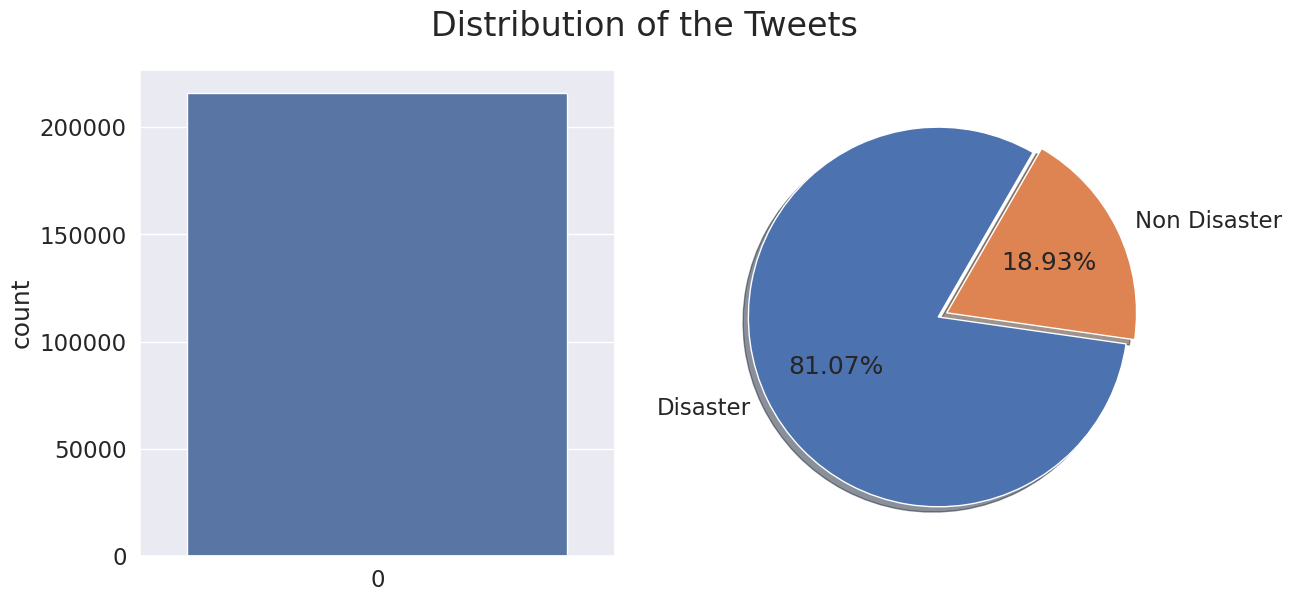

In [23]:
# Displaying target distribution.

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 6), dpi=100)
sns.countplot(trainv['Target'], ax=axes[0])
axes[1].pie(trainv['Target'].value_counts(),
            labels=['Disaster', 'Non Disaster'],
            autopct='%1.2f%%',
            shadow=True,
            explode=(0.05, 0),
            startangle=60)
fig.suptitle('Distribution of the Tweets', fontsize=24)
plt.show()

In [24]:
!pip install utils


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
trainv['Character Count'] = trainv['Tweet_clean'].apply(lambda x: len(str(x)))


def plot_dist3(df, feature, title):
    # Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(18, 8))
    # Creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title.
    ax1.set_title('Histogram')
    # plot the histogram.
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 color='#e74c3c')
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))

    # Customizing the ecdf_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title.
    ax2.set_title('Empirical CDF')
    # Plotting the ecdf_Plot.
    sns.distplot(df.loc[:, feature],
                 ax=ax2,
                 kde_kws={'cumulative': True},
                 hist_kws={'cumulative': True},
                 color='#e74c3c')
    ax2.xaxis.set_major_locator(MaxNLocator(nbins=20))
    ax2.set(ylabel='Cumulative Probability')

    # Customizing the Box Plot.
    ax3 = fig.add_subplot(grid[:, 2])
    # Set title.
    ax3.set_title('Box Plot')
    # Plotting the box plot.
    sns.boxplot(x=feature, data=df, orient='v', ax=ax3, color='#e74c3c')
    ax3.yaxis.set_major_locator(MaxNLocator(nbins=25))

    plt.suptitle(f'{title}', fontsize=24)

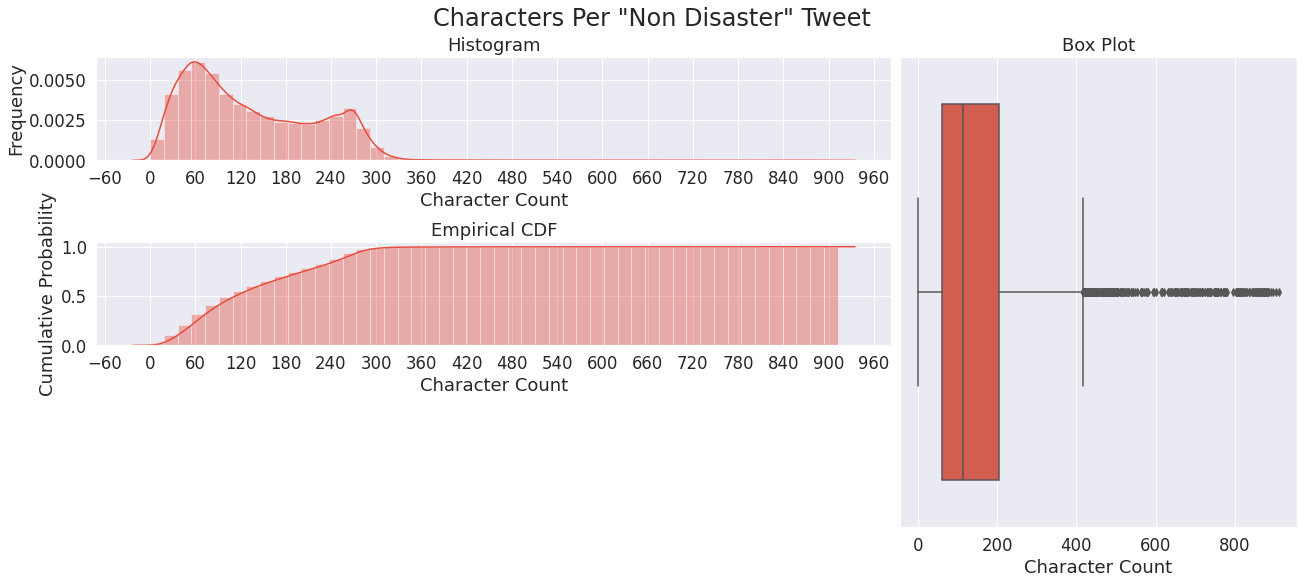

In [26]:
plot_dist3(trainv[trainv['Target'] == 0], 'Character Count',
           'Characters Per "Non Disaster" Tweet')

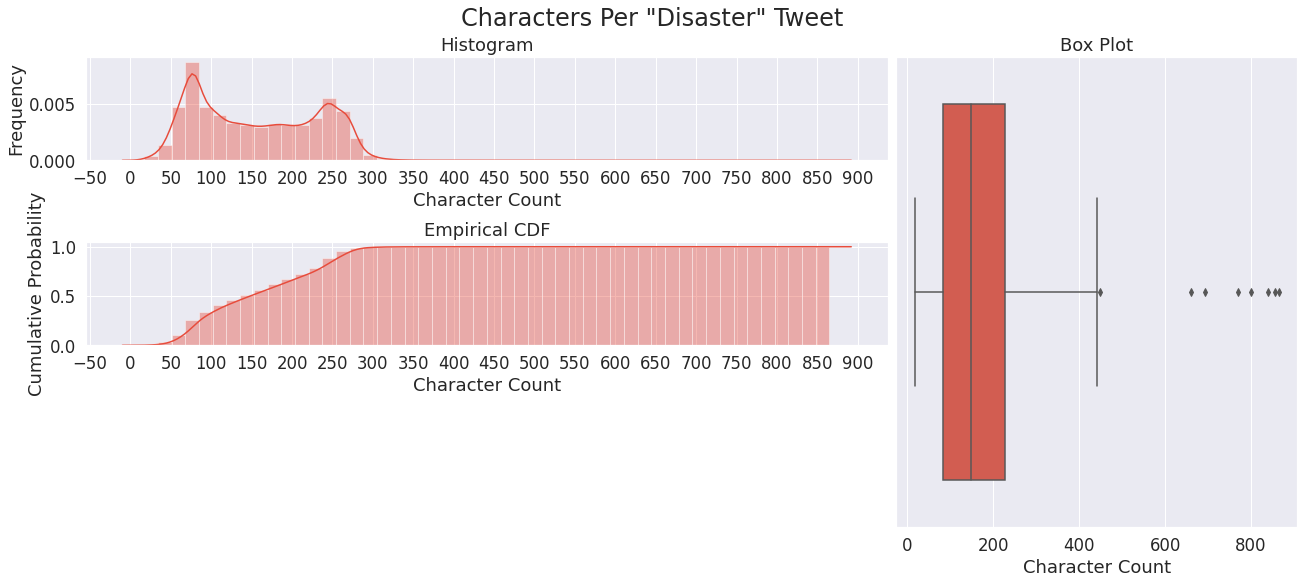

In [27]:
plot_dist3(trainv[trainv['Target'] == 1], 'Character Count',
           'Characters Per "Disaster" Tweet')

Word Counts

In [28]:
def plot_word_number_histogram(textno, textye):
    
    """A function for comparing word counts"""

    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 6), sharey=True)
    sns.distplot(textno.str.split().map(lambda x: len(x)), ax=axes[0], color='#e74c3c')
    sns.distplot(textye.str.split().map(lambda x: len(x)), ax=axes[1], color='#e74c3c')
    
    axes[0].set_xlabel('Word Count')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Non Disaster Tweets')
    axes[1].set_xlabel('Word Count')
    axes[1].set_title('Disaster Tweets')
    
    fig.suptitle('Words Per Tweet', fontsize=24, va='baseline')
    
    fig.tight_layout()

In [29]:
def plot_word_len_histogram(textno, textye):
    
    """A function for comparing average word length"""
    
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 6), sharey=True)
    sns.distplot(textno.str.split().apply(lambda x: [len(i) for i in x]).map(
        lambda x: np.mean(x)),
                 ax=axes[0], color='#e74c3c')
    sns.distplot(textye.str.split().apply(lambda x: [len(i) for i in x]).map(
        lambda x: np.mean(x)),
                 ax=axes[1], color='#e74c3c')
    
    axes[0].set_xlabel('Word Length')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Non Disaster Tweets')
    axes[1].set_xlabel('Word Length')
    axes[1].set_title('Disaster Tweets')
    
    fig.suptitle('Mean Word Lengths', fontsize=24, va='baseline')
    fig.tight_layout()

Word Lengths

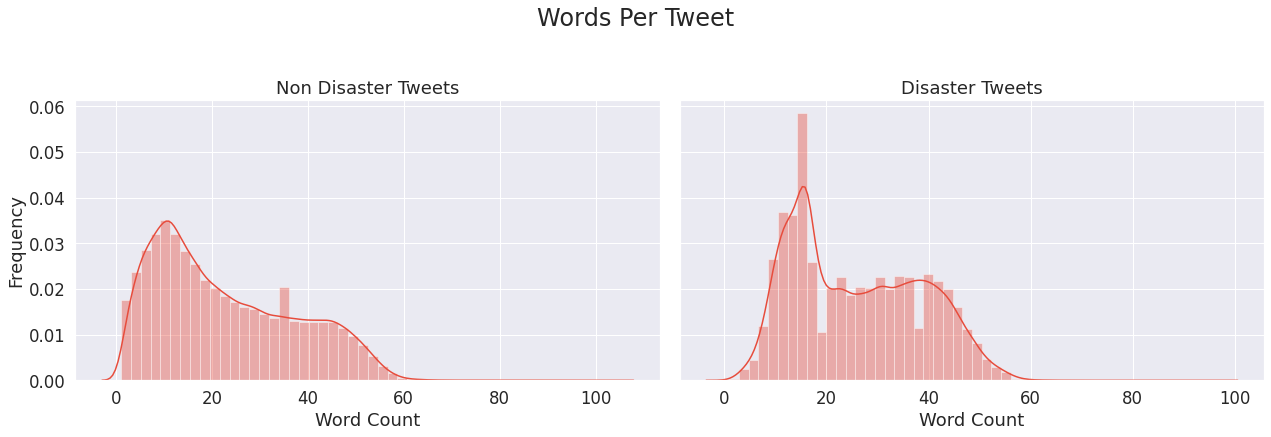

In [30]:
plot_word_number_histogram(trainv[trainv['Target'] == 0]['Tweet'],
                           trainv[trainv['Target'] == 1]['Tweet'])

In [31]:
lis = [
    trainv[trainv['Target'] == 0]['Lemma_str'],
    trainv[trainv['Target'] == 1]['Lemma_str']
]

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()

for i, j in zip(lis, axes):
    try:
        new = i.str.split()
        new = new.values.tolist()
        corpus = [word.lower() for i in new for word in i]
        dic = defaultdict(int)
        for word in corpus:
            if word in stop:
                dic[word] += 1

        top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:15]
        x, y = zip(*top)
        df = pd.DataFrame([x, y]).T
        df = df.rename(columns={0: 'Stopword', 1: 'Count'})
        sns.barplot(x='Count', y='Stopword', data=df, palette='plasma', ax=j)
        plt.tight_layout()
    except:
        plt.close()
        print('No stopwords left in texts.')
        break

No stopwords left in texts.


Most Common Words

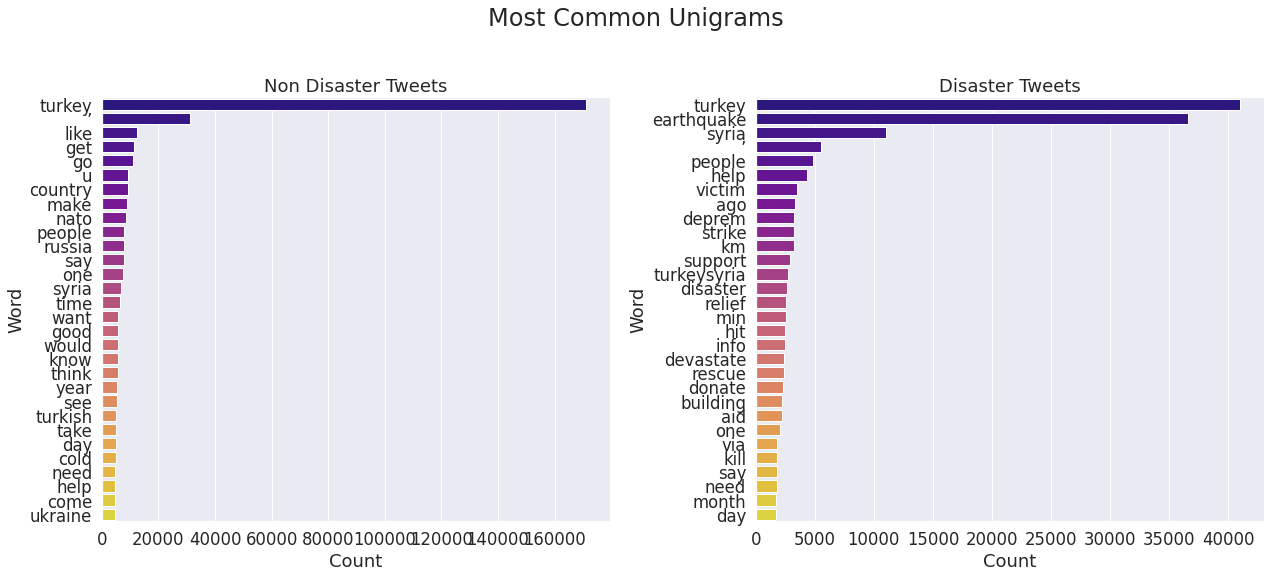

In [33]:
# Displaying most common words.

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()

for i, j in zip(lis, axes):

    new = i.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []
    for word, count in most[:30]:
        if (word not in stop):
            x.append(word)
            y.append(count)

    sns.barplot(x=y, y=x, palette='plasma', ax=j)
axes[0].set_title('Non Disaster Tweets')

axes[1].set_title('Disaster Tweets')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Word')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Word')

fig.suptitle('Most Common Unigrams', fontsize=24, va='baseline')
plt.tight_layout()


In [34]:
def ngrams(n, title):
    """A Function to plot most common ngrams"""
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    axes = axes.flatten()
    for i, j in zip(lis, axes):

        new = i.str.split()
        new = new.values.tolist()
        corpus = [word for i in new for word in i]

        def _get_top_ngram(corpus, n=None):
            #getting top ngrams
            vec = CountVectorizer(ngram_range=(n, n),
                                  max_df=0.9,
                                  stop_words='english').fit(corpus)
            bag_of_words = vec.transform(corpus)
            sum_words = bag_of_words.sum(axis=0)
            words_freq = [(word, sum_words[0, idx])
                          for word, idx in vec.vocabulary_.items()]
            words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
            return words_freq[:15]

        top_n_bigrams = _get_top_ngram(i, n)[:15]
        x, y = map(list, zip(*top_n_bigrams))
        sns.barplot(x=y, y=x, palette='plasma', ax=j)
        
        axes[0].set_title('Non Disaster Tweets')
        axes[1].set_title('Disaster Tweets')
        axes[0].set_xlabel('Count')
        axes[0].set_ylabel('Words')
        axes[1].set_xlabel('Count')
        axes[1].set_ylabel('Words')
        fig.suptitle(title, fontsize=24, va='baseline')
        plt.tight_layout()

Most Common Bigrams

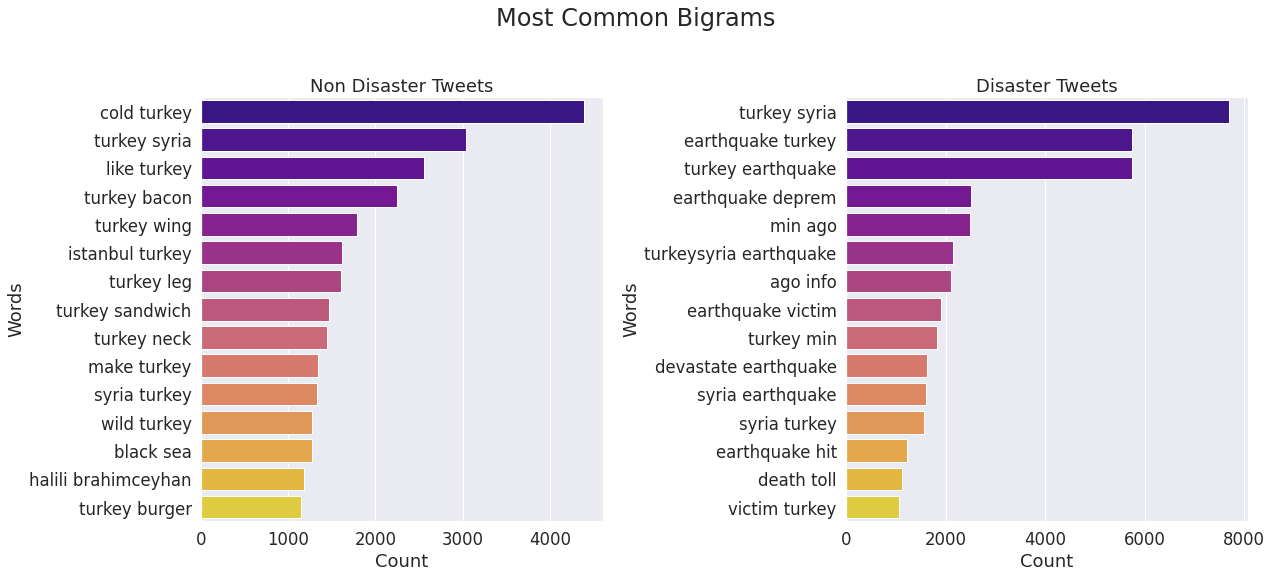

In [35]:
ngrams(2, 'Most Common Bigrams')

Most Common Trigrams

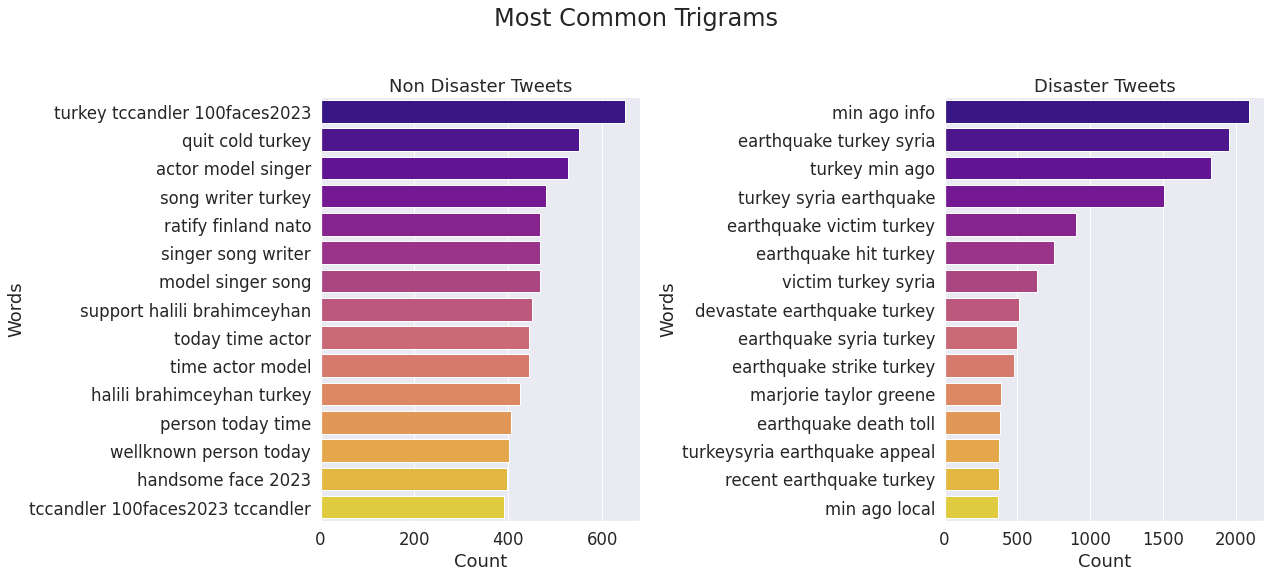

In [36]:
ngrams(3, 'Most Common Trigrams')

Determining Topics - some extra analysis

In [37]:
def display_topics(text, no_top_words, topic):
    
    """ A function for determining the topics present in our corpus with nmf """
    
    no_top_words = no_top_words
    tfidf_vectorizer = TfidfVectorizer(
        max_df=0.90, min_df=25, max_features=5000, use_idf=True)
    tfidf = tfidf_vectorizer.fit_transform(text)
    tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
    doc_term_matrix_tfidf = pd.DataFrame(
        tfidf.toarray(), columns=list(tfidf_feature_names))
    nmf = NMF(n_components=10, random_state=0, l1_ratio=.1, init='nndsvd').fit(tfidf)

   # nmf = NMF(n_components=10, random_state=0,
    #          alpha=.1, init='nndsvd').fit(tfidf)
    print(topic)
    for topic_idx, topic in enumerate(nmf.components_):
        print('Topic %d:' % (topic_idx+1))
        print(' '.join([tfidf_feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))


display_topics(lis[0], 10, 'Non Disaster Topics\n')


Non Disaster Topics

Topic 1:
syria country russia people help ukraine one india come say
Topic 2:
nato finland sweden erdogan bid membership ratify say join president
Topic 3:
tccandler 100faces2023 brahimceyhan halili model actor singer vote support writer
Topic 4:
go cold quit back day year time need im stop
Topic 5:
make sandwich burger good cheese chicken eat ground great dinner
Topic 6:
like look thanksgiving feel would sound chicken eat taste see
Topic 7:
bacon egg eat cheese love good pork breakfast sausage sandwich
Topic 8:
get ta leg neck back one teeth need well im
Topic 9:
istanbul 2023 manager turkish ankara travel türkiye sale march specialist
Topic 10:
want wing leg neck rice smother dinner green cook bad


In [38]:
display_topics(lis[1], 10,'Disaster Topics\n')

Disaster Topics

Topic 1:
km min info deprem ago strike earthquake sw göksun nw
Topic 2:
syria victim earthquake aid russia unitedstate send ronaldo devastate cristiano
Topic 3:
hit building magnitude collapse 56 quake new kill another topple
Topic 4:
death toll 50000 rise surpass top 47000 climb earthquake pass
Topic 5:
vote mourn greene taylor marjorie turkeysyria victim 50000 house republican
Topic 6:
rescue dog rubble day 23 via cat animal team horse
Topic 7:
earthquake turkeysyria news via survivor youtube another turkeyearthquake cause fear
Topic 8:
people disaster month devastate say country one kill world damage
Topic 9:
help support donate relief need raise victim effort donation please
Topic 10:
utc reportinfo mar ago feb 5mins 6mins m33 earthquake 4mins


Word Cloud

In [39]:
trainv['Lemmatized'] = trainv['Lemmatized'].fillna('').astype(str)

In [40]:
print(trainv.columns)


Index(['User_id', 'Username', 'Tweet_id', 'Date', 'Time', 'Tweet', 'Language',
       'Location', 'Acctdesc', 'Source', 'Replies', 'Retweets', 'Likes',
       'Hashtags', 'Following', 'Followers', 'Total_tweets', 'Extracted',
       'Url', 'Tweet_clean', 'Tokenized', 'Lower', 'Stopwords_removed',
       'Pos_tags', 'Wordnet_pos', 'Lemmatized', 'Lemma_str', 'Target',
       'Character Count'],
      dtype='object')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


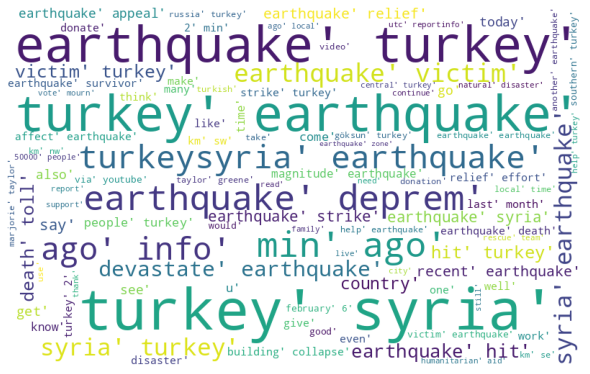

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))


text = ' '.join(trainv[trainv['Target'] == 1]['Lemmatized'])

wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                stopwords = set(stopwords), 
                min_font_size = 10).generate(text)

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()


Named Entity Recognition

In [42]:
!python -m spacy download en_core_web_sm


/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-19 16:31:44.650343: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-19 16:31:44.650460: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-19 16:31:44.650483: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [43]:
# Loading NER.
nlp = en_core_web_sm.load() 

In [44]:
def plot_named_entity_barchart(text):
    
    """A function for extracting named entities and comparing them"""
    
    def _get_ner(text):
        doc = nlp(text)
        return [X.label_ for X in doc.ents]

    ent = text.apply(lambda x: _get_ner(x))
    ent = [x for sub in ent for x in sub]
    counter = Counter(ent)
    count = counter.most_common()

    x, y = map(list, zip(*count))
    sns.barplot(x=y, y=x)

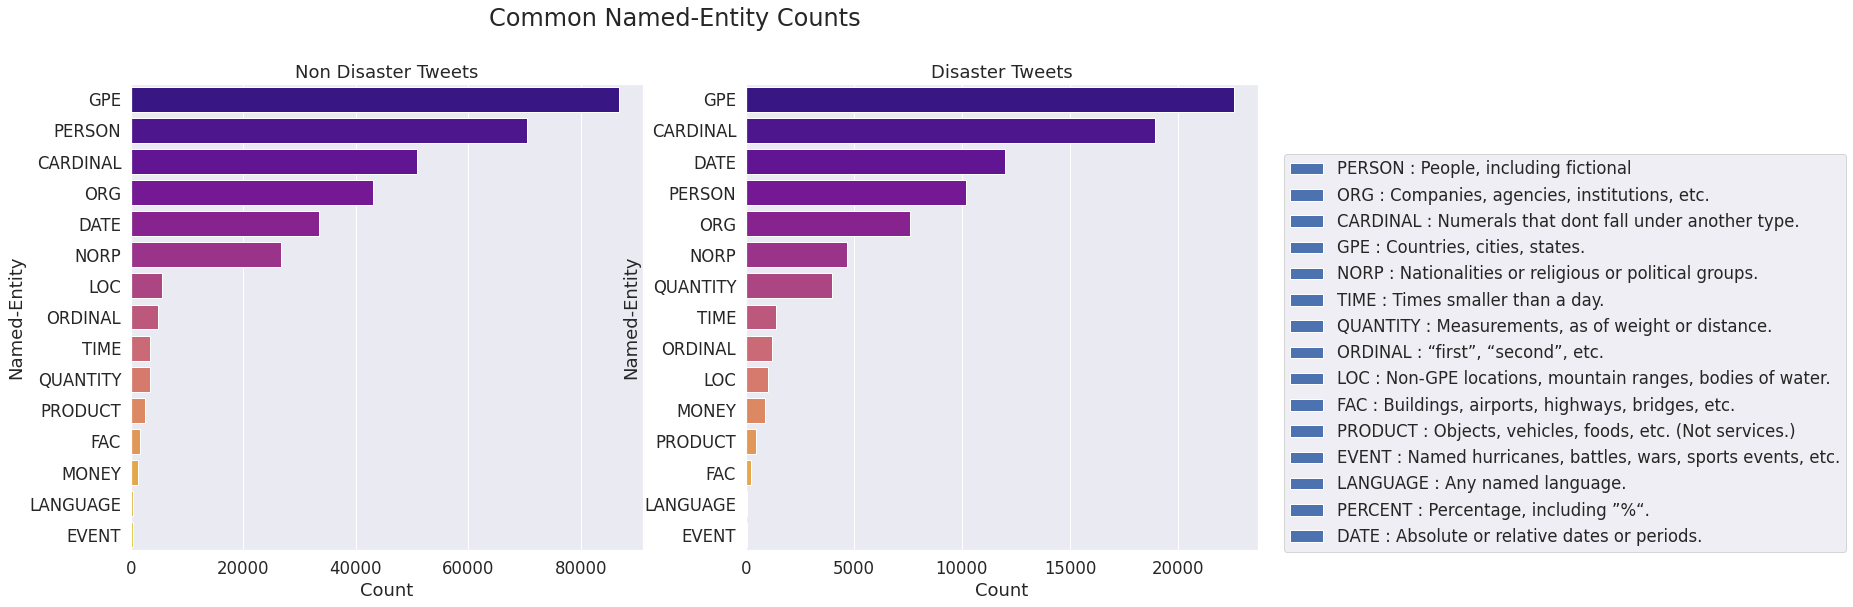

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()
for i, j in zip(lis, axes):

    def _get_ner(i):
        doc = nlp(i)
        return [X.label_ for X in doc.ents]

    ent = i.apply(lambda x: _get_ner(x))
    ent = [x for sub in ent for x in sub]
    counter = Counter(ent)
    count = counter.most_common()[:15]

    x, y = map(list, zip(*count))
    sns.barplot(x=y, y=x, ax=j, palette='plasma')

axes[0].set_title('Non Disaster Tweets')
axes[1].set_title('Disaster Tweets')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Named-Entity')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Named-Entity')
fig.suptitle('Common Named-Entity Counts', fontsize=24, va='baseline')



patch1 = mpatches.Patch(label='PERSON : People, including fictional')
patch2 = mpatches.Patch(label='ORG : Companies, agencies, institutions, etc.')
patch3 = mpatches.Patch(label='CARDINAL : Numerals that dont fall under another type.')
patch4 = mpatches.Patch(label='GPE : Countries, cities, states.')
patch5 = mpatches.Patch(label='NORP : Nationalities or religious or political groups.')
patch6 = mpatches.Patch(label='TIME : Times smaller than a day.')
patch7 = mpatches.Patch(label='QUANTITY : Measurements, as of weight or distance.')
patch8 = mpatches.Patch(label='ORDINAL : “first”, “second”, etc.')
patch9 = mpatches.Patch(label='LOC : Non-GPE locations, mountain ranges, bodies of water.')
patch10 = mpatches.Patch(label='FAC : Buildings, airports, highways, bridges, etc.')
patch11 = mpatches.Patch(label='PRODUCT : Objects, vehicles, foods, etc. (Not services.)')
patch12 = mpatches.Patch(label='EVENT : Named hurricanes, battles, wars, sports events, etc.')
patch13 = mpatches.Patch(label='LANGUAGE : Any named language.')
patch14 = mpatches.Patch(label='PERCENT : Percentage, including ”%“.')
patch15 = mpatches.Patch(label='DATE : Absolute or relative dates or periods.')



plt.legend(handles=[patch1, patch2, patch3, patch4, patch5, patch6, patch7, patch8, patch9, patch10, patch11, patch12, patch13, patch14, patch15, ],bbox_to_anchor=(1.05, 0.85), loc='upper left', borderaxespad=0.)

plt.show()

In [46]:
trainv.head()

,User_id,Username,Tweet_id,Date,Time,Tweet,Language,Location,Acctdesc,Source,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Extracted,Url,Tweet_clean,Tokenized,Lower,Stopwords_removed,Pos_tags,Wordnet_pos,Lemmatized,Lemma_str,Target,Character Count
0,2726643290,BarzaniCF,1.6297574106624e+18,2/26/23 12:00 AM,8:17:00,#BCF preparing parcels of food at #Erbil headq...,en,Iraq,The BCF is a non-profit non-governmental organ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.0,16.0,141,"['#BCF', '#Erbil', '#earthquake', '#Turkey', '...",1.0,11138.0,1389.0,02:14.6,https://twitter.com/BarzaniCF/status/162975741...,BCF preparing parcels of food at Erbil headqua...,"[BCF, preparing, parcels, of, food, at, Erbil,...","[bcf, preparing, parcels, of, food, at, erbil,...","[bcf, preparing, parcels, food, erbil, headqua...","[(bcf, NN), (preparing, VBG), (parcels, NNS), ...","[(bcf, n), (preparing, v), (parcels, n), (food...","['bcf', 'prepare', 'parcel', 'food', 'erbil', ...",bcf prepare parcel food erbil headquarter eart...,True,185
1,1330584404226430000,pslovekatelynn,1.6371243434308e+18,3/18/23 12:00 AM,16:10:34,Do I get a Philly or a mile high turkey from L...,en,NaN,23. 🩺 | Published Author,"<a href=""http://twitter.com/download/iphone"" r...",0.0,0.0,0.0,[],188.0,214.0,1815.0,43:19.8,https://twitter.com/pslovekatelynn/status/1637...,Do I get a Philly or a mile high turkey from L...,"[Do, I, get, a, Philly, or, a, mile, high, tur...","[do, i, get, a, philly, or, a, mile, high, tur...","[get, philly, mile, high, turkey, lenny, ’, co...","[(get, VB), (philly, RB), (mile, JJ), (high, J...","[(get, v), (philly, r), (mile, a), (high, a), ...","['get', 'philly', 'mile', 'high', 'turkey', 'l...",get philly mile high turkey lenny ’ conflict,False,67
2,700330759,JJTHEGYMRAT,1.6285544647674e+18,2/23/23 12:00 AM,0:36:56,"@Roastbeast26 Chicken, lean ground sirloin , l...",en,"Florida, USA",I lift and say fuck a lot #bebetter #noexcuse...,"<a href=""http://twitter.com/download/iphone"" r...",1.0,0.0,1,[],373.0,2862.0,21467.0,40:58.7,https://twitter.com/JJTHEGYMRAT/status/1628554...,Roastbeast26 Chicken lean ground sirloin lean...,"[Roastbeast26, Chicken, lean, ground, sirloin,...","[roastbeast26, chicken, lean, ground, sirloin,...","[roastbeast26, chicken, lean, ground, sirloin,...","[(roastbeast26, NN), (chicken, JJ), (lean, JJ)...","[(roastbeast26, n), (chicken, a), (lean, a), (...","['roastbeast26', 'chicken', 'lean', 'ground', ...",roastbeast26 chicken lean ground sirloin lean ...,False,117
3,1476218094196500000,AlexLacl,1.63678498972253e+18,3/17/23 12:00 AM,17:42:06,@nandy_here @sinanseventy @Onlyhur1 @FormulaUR...,en,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",3.0,0.0,1.0,[],155.0,44.0,1271.0,52:06.1,https://twitter.com/AlexLacl/status/1636784989...,nandyhere sinanseventy Onlyhur1 FormulaUR Alon...,"[nandyhere, sinanseventy, Onlyhur1, FormulaUR,...","[nandyhere, sinanseventy, onlyhur1, formulaur,...","[nandyhere, sinanseventy, onlyhur1, formulaur,...","[(nandyhere, RB), (sinanseventy, JJ), (onlyhur...","[(nandyhere, r), (sinanseventy, a), (onlyhur1,...","['nandyhere', 'sinanseventy', 'onlyhur1', 'for...",nandyhere sinanseventy onlyhur1 formulaur alon...,False,314
4,1209233672,BasilBandwagon,1.63382307944396e+18,3/9/23 12:00 AM,13:32:31,"#Clinton Soups: Turkey Veggie Noodles (gf), Sm...",en,"Hunterdon County, New Jersey",Hunterdon County's premier Natural Market and ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,0.0,0.0,"['#Clinton', '#Clinton']",1698.0,867.0,5473.0,04:08.3,https://twitter.com/BasilBandwagon/status/1633...,Clinton Soups Turkey Veggie Noodles gf Smoky W...,"[Clinton, Soups, Turkey, Veggie, Noodles, gf, ...","[clinton, soups, turkey, veggie, noodles, gf, ...","[clinton, soups, turkey, veggie, noodles, gf, ...","[(clinton, NN), (soups, NNS), (turkey, VBP), (...","[(clinton, n), (soups, n), (turkey, v), (veggi...","['clinton', 'soup', 'turkey', 'veggie', 'noodl...",clinton

In [47]:
testv.head()

,User_id,Username,Tweet_id,Date,Time,Tweet,Language,Location,Acctdesc,Source,Replies,Retweets,Likes,Hashtags,Following,Followers,Total_tweets,Extracted,Url
0,90466734,Gjallarhornet,1.63421589958974e+18,3/10/23 12:00 AM,15:33:27,Turkish police fire pepper spray after Interna...,en,"Helsingborg, Skåne Sweden","I´m the god Odin, all people's and gods' fathe...","<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,1.0,1.0,"['#protest', '#Istanbul', '#Turkey', '#Kurds',...",9592.0,8727.0,198357.0,55:24.9,https://twitter.com/Gjallarhornet/status/16342...
1,1597965797321600000,Mahavendors,1629126004034910000,2/24/23 12:00 AM,14:28:01,3 manufacturer of air motor\nGast Manufacturin...,ca,NaN,Maha Vendors is created to help buyers to get ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,0.0,0,"['#airmotor', '#vendorlist', '#japan', '#italy...",42.0,2.0,83.0,21:25.7,https://twitter.com/Mahavendors/status/1629126...
2,1358511532590700000,cyriptoman4,1.63009013771453e+18,2/27/23 12:00 AM,6:19:09,#Gateio ne yapmaya çalışıyorsunuz? \n\n#man #k...,tr,NaN,♨ AÜ İŞLETME ♨️ DANISMAN ♨ \n\n⚓️ETKİ YATIRIM ...,"<a href=""http://twitter.com/download/android"" ...",3.0,7.0,27,"['#Gateio', '#man', '#kucoin', '#man', '#Gatei...",92.0,7465.0,9444.0,52:16.5,https://twitter.com/cyriptoman4/status/1630090...
3,836531188181381000,MichalBienkowsk,1632948485728130000,3/7/23 12:00 AM,3:37:12,@T_Karamollaoglu @kilicdarogluk All best wishe...,en,NaN,“Life can only be understood backwards; but it...,"<a href=""http://twitter.com/download/android"" ...",0.0,0.0,0,[],696.0,147.0,2554.0,28:01.4,https://twitter.com/MichalBienkowsk/status/163...
4,837120460047384000,mattprice170,1629322407348510000,2/25/23 12:00 AM,3:28:27,@LivEchonews My settee shook on the 2nd floor ...,en,"Rhondda Cynon Taff, Wales",🏴󠁧󠁢󠁷󠁬󠁳󠁿 Annibyniaeth. Cymru am byth. Big Liver...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",1.0,0.0,2,[],1779.0,1629.0,13713.0,14:49.7,https://twitter.com/mattprice170/status/162932...


In [51]:
trainv.to_csv('train1.csv', index=False)

In [49]:
testv.to_csv('test1.csv',index=False)